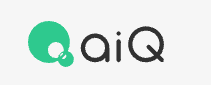

[disclaimer](./disclaimer.txt/)

# How to look up FACTSET Data from list factor, list tickers or list symbols
This sample show how to achieve the following operation with a simple interface:
- Look up the unique FACTSET instrument ID (FSYM_ID) from list symbols
- Look up the unique FACTSET instrument ID from list tickers

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database / API for Equity Data  ## Import ASR Data Accessor Library (DAL)

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from list factors and symbols.

####  **load**
> Load the data to memory  
> Set data_type = 'quants_factor_data' for looking up instrument IDs.

In [2]:
# `data_type` must be 'quants_factor_data'

handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    # list_tickers="MH33D6-R",
    # freq="CY",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    # num_chunks=10,
)

#### **Retrieve**
> `Pandas.DataFrame` the loaded data via `retrieve`

In [3]:
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2023-01-31,-1.376834


### Pattern 2: Look up FSYM_ID from list factors and tickers
> If you know tickers, then it is quicker as in the next example.

In [7]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    # list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    list_tickers="MH33D6-R",
    # freq="CY",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    # num_chunks=10,
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2023-01-31,-1.376834


### Pattern 3: Look up FSYM_ID to be added to freq parameter.
>Frequency can be selected from "d", "w", "m", "am", "cq", "ay" and "cy".

In [8]:
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    list_tickers="MH33D6-R",
    freq="CY",  # ["D", "W", "M", "AM", "CQ", "AY", "CY"]
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    # num_chunks=10,
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2022-12-30,-1.432398


### Pattern 4: Look up FSYM_ID to be added to num_chunk parameter.


num_chunk(chunksize) is a parameter used to split large data into smaller parts to be read in.

In [9]:
# The input argment for FSYM_ID is `factset_id`.
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    # list_tickers="MH33D6-R",
    # freq="CY",  # kore
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    num_chunks=100,

)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,,ebitMgnFwdChg3Yr
symbol,datetime,
MH33D6-R,2023-01-31,-1.376834


#### Caution: You must provide 'list_factors' and can not do provide both 'list_tickers' and 'list_symbols' at the same time

Either 'list_tickers' or 'list_symbols' must be provided, so both parameter can not be empty.

In [10]:
# An error is thrown if you input without both 'list_tickers' and 'list_symbols'.
handler = handler.load(
    data_source, # type: ignore
    data_type='quants_factor_data',
    # list_symbols="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    # list_tickers="MH33D6-R",
    freq="CY",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01",
    num_chunks=10,
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

ValueError: Either 'list_tickers' or 'list_symbols' must be provided, but both are empty.